### 排名预测

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error    
#mean_squared_error均方误差,mean_absolute_error平均均方误差
from sklearn.externals import joblib  #模型保存
from sklearn.feature_extraction import DictVectorizer#字典提取

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge 

### 加载数据

In [5]:
#1,加载数据
data_train = pd.read_csv('../data_PUBG_to_stu/train_V2.csv')
data_test = pd.read_csv('../data_PUBG_to_stu/test_V2.csv')


In [ ]:
print('训练集:\n',data_train.head())
print('测试集:\n',data_test.head())

In [8]:
print(data_train)

                     Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
5        ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
6        95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0       0   
7        311b84c6ff4390  eaba5fcb7fc1ae  292611730ca862        0       0   
8        1a68204ccf9891  47cfbb04e1b1a2  df014fbee741c6        0       0   
9        e5bb5a43587253  759bb6f7514fd2  3d3031c795305b        0       0   
10       2b574d43972813  c549efede67ad3  2dd6ddb8320fc1        0       0   
11       8de328a74658a9  f643df9df3877c  80170383d90003        0       0   
12       ce4

In [27]:
print(data_test)
#测试集无目标值,即要先在训练集中分割数据进行训练

                     Id         groupId         matchId  assists  boosts  \
0        9329eb41e215eb  676b23c24e70d6  45b576ab7daa7f        0       0   
1        639bd0dcd7bda8  430933124148dd  42a9a0b906c928        0       4   
2        63d5c8ef8dfe91  0b45f5db20ba99  87e7e4477a048e        1       0   
3        cf5b81422591d1  b7497dbdc77f4a  1b9a94f1af67f1        0       0   
4        ee6a295187ba21  6604ce20a1d230  40754a93016066        0       4   
5        3e2539b5d78183  029b5a79e08cd6  10186f5c852f62        0       0   
6        d812d2f1d88a02  6285bb4eec83e4  f185809740a1a7        0       3   
7        a8a377e4d43bf8  61ec2e7730a3b8  d31adc82a4930e        0       0   
8        f18301e30d47d3  e7d609e08f09b6  bcde504ef16743        0       0   
9        ec7b965ef978b3  c4c19ef6d6c6d9  6dc5b34c92d5ff        0       0   
10       29da9623f0e316  6a47335104d64e  ed3e886148b4e2        1       2   
11       9a7777f1868aba  e7de3c00dd513f  d29026562c5e4b        0       0   
12       aed

### 数据基本处理

#### 空值检查

In [4]:
#训练集空值检查
print(np.any(data_train.isnull()))

True


In [6]:
#测试集空值检查
print(np.any(data_test.isnull()))

False


In [8]:
print(np.any(y.isnull()))#目标值非空

False


In [64]:
a_list=[]
for c_column in data_train.columns:
    a_list.append(c_column)
print(a_list)
#     print(c_column,'-->',data_train[c_column].dtype)
#     if np.any(data_train[c_column].isnull()) == True:  
#         print('空值:',c_column,'-->',data_train[c_column].dtype
#     print(c_column,'-->',data_train[c_column].dtype)

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


#### 标准化

#### 查看winPoints与winPlacePerc 的关系

In [16]:
print(data_train.shape)

(4446966, 29)


#### 删除空值所在行

In [7]:
#删除空值所在行

# 删除缺失值, 默认按行删除; 只要这一行有缺失就删除
new_train = data_train.dropna()

print(new_train.shape)


(4446965, 29)


In [8]:
#训练集空值检查
print(np.any(new_train.isnull()))

False


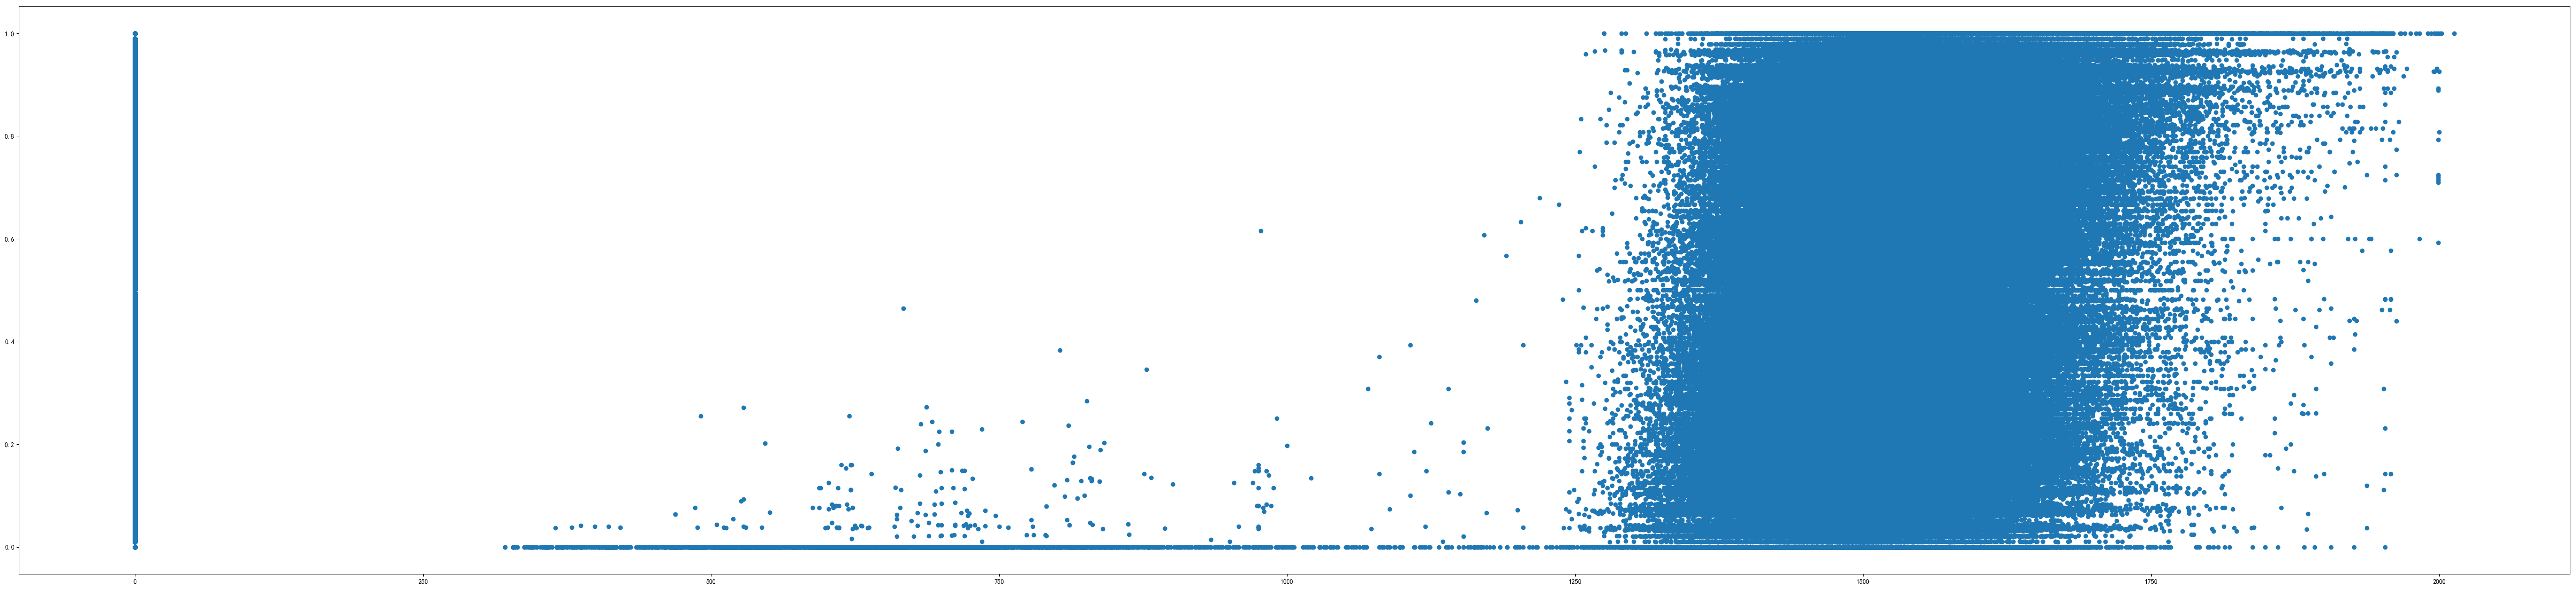

<Figure size 432x288 with 0 Axes>

In [23]:
#查看关系
#数据

#创建画布
plt.figure(figsize=(70,16),dpi=100)

# plt.plot(new_train['winPoints'],new_train['winPlacePerc'])
plt.scatter(new_train['winPoints'],new_train['winPlacePerc'])
plt.show()
plt.savefig('winPoints与winPlacePerc分布.png')


In [47]:
x_drop_matchType = new_train.drop(['matchType'], axis=1) 

In [61]:
print(x_drop_matchType)

                     Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
5        ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
6        95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0       0   
7        311b84c6ff4390  eaba5fcb7fc1ae  292611730ca862        0       0   
8        1a68204ccf9891  47cfbb04e1b1a2  df014fbee741c6        0       0   
9        e5bb5a43587253  759bb6f7514fd2  3d3031c795305b        0       0   
10       2b574d43972813  c549efede67ad3  2dd6ddb8320fc1        0       0   
11       8de328a74658a9  f643df9df3877c  80170383d90003        0       0   
12       ce4

#### 选择特征值和目标值

In [66]:
#2.1选择特征值和目标值
x = new_train[['assists', 
 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
 'longestKill', 'matchDuration', 'maxPlace',
 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 
 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
 'weaponsAcquired', 'winPoints']]

In [67]:

# x = x_drop_matchType.iloc[:, 3:-1].values
y= new_train['winPlacePerc']

#### 切割训练集的特征区域,不含ID,DataFrame类型

In [47]:
# # 将object编码 matchType ,,方式1热编码,2数字编码化
# # 1、实例化一个转换器类
# transfer = DictVectorizer(sparse=False)
# # 2、调用fit_transform
# data_train_DictV =transfer.fit_transform(x.to_dict(orient='records'))
                                         
# print("返回的结果:\n", data_train_DictV)
# # 打印特征名字
# print("特征名字：\n", transfer.get_feature_names())

MemoryError: 

In [68]:
#数据类型转换
x_trans =x.astype('float64')

In [69]:
#2.3(对训练集)数据分割
x_train,x_test,y_train,y_test = train_test_split(x_trans,y,test_size =0.3,random_state = 8)

In [58]:
print(y_train,x_train )

3211939    0.0000
2634459    0.0769
4243885    0.4194
19461      0.4149
953529     0.3214
2873576    0.1250
782977     0.0417
1418029    0.0851
2024668    0.4074
177402     0.4194
2569947    0.6429
1726717    0.2979
725728     0.9630
3600100    0.6087
1252395    0.5926
2001184    0.3846
3970119    0.0385
3209326    0.8571
1948449    0.7037
3593301    0.8667
4422367    0.7308
1021154    0.3878
772837     0.5833
2310214    0.6400
291321     0.2143
3462188    0.6296
3536748    0.0000
578539     0.7283
2216856    0.9231
3335138    0.0000
            ...  
2607132    0.4667
2636488    0.0444
1608213    0.4222
689628     0.0370
3329808    0.2021
2707307    0.1170
3876582    0.6538
3173386    0.3571
1927014    0.8267
219306     0.2473
53811      0.0800
1333688    1.0000
2325606    0.3404
1432891    0.7234
1529181    0.0690
1792143    0.8667
173117     0.3462
2873226    0.3200
2822414    0.7917
4272796    0.0625
32689      0.2000
1880892    0.4388
3355734    0.0000
3028846    0.2500
2043583   

### KNN与模型评估
- 回归

In [ ]:
#机器学习 KNN
estimator =KNeighborsRegressor()

#学习:训练集特征值,训练集目标值
estimator.fit(x_train,y_train)




In [ ]:
#模型评估
#使用模型对测试集进行预测,参数为测试集的特征值,返回为预测目标值
y_pre =estimator.predict(x_test)


#准确率
score =estimator.score(x_test,y_test)
print('准确率:',score)

mae = mean_absolute_error(y_test,y_pre)
print('平均绝对误差:',mae)

### LinearRegression,SGDRegressor,Ridge

In [ ]:

def general(estimator_method):

    
    #机器学习 
    estimator = estimator_method()#代入
    estimator.fit(x_train,y_train)
    
    #模型评估
    print('模型系数:',estimator.coef_)
    print('模型偏置:',estimator.intercept_)
    #预测
    y_pre = estimator.predict(x_test)

    #模型评估
    mse =mean_squared_error(y_test,y_pre)
    print('均方误差:',mse)
    #平均绝对误差
    mae = mean_absolute_error(y_test,y_pre)
    print('平均绝对误差:',mae)
    print('-'*20)
    
# 调用   
general(LinearRegression)
general(SGDRegressor)
general(Ridge)

In [ ]:
# 
from xgboost import 